# Pandas Introduction

Framework of this course and some examples are taken from the [Quantopian](https://www.quantopian.com/lectures). Quantopian lectures are not for Python version we use in the course. So there are some syntax differences. 

We far we learnt basic concepts about the libraries with [Numpy Introduction](https://itueconomics.github.io/bil113e/python2-numpy.html) course. We will introduce another major library used for stastics, big data and similar works. We will use pandas with numpy. So we import our libraries:

In [58]:
import numpy as np
import pandas as pd

Please add a command to show `matplotlib` libraries. We will introduce `matplotlib` library in the **Data Visualization** course later.

In [59]:
%matplotlib inline

Let's create a [random.normal](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html) function to define a random dataset contains 100 values, with mean $0$ and standard deviation $ 0.5$.

In [60]:
dist = np.random.normal(0, 0.5, (100,))

In [61]:
print(dist.shape)

(100,)


## Series

Using `pandas` library we can convert `dist` array into a `Series`:

In [72]:
s = pd.Series(dist)

In [121]:
s.head() # First 5 element

2016-01-01    0.483070
2016-01-04   -0.311935
2016-01-05    0.064338
2016-01-06   -1.340761
2016-01-07   -0.048894
Freq: B, Name: Stock returns, dtype: float64

In [122]:
s.head(10) # First 10 element

2016-01-01    0.483070
2016-01-04   -0.311935
2016-01-05    0.064338
2016-01-06   -1.340761
2016-01-07   -0.048894
2016-01-08    0.684970
2016-01-11    0.418712
2016-01-12    0.468986
2016-01-13    0.199612
2016-01-14    1.185406
Freq: B, Name: Stock returns, dtype: float64

In [123]:
s.tail() # Last 5 element

2016-05-13   -0.098090
2016-05-16    0.474426
2016-05-17    0.175430
2016-05-18   -0.412900
2016-05-19   -0.394906
Freq: B, Name: Stock returns, dtype: float64

In [124]:
s.tail(10) # Last 10 element

2016-05-06   -0.065045
2016-05-09   -0.019158
2016-05-10   -0.881440
2016-05-11    0.604379
2016-05-12    0.143153
2016-05-13   -0.098090
2016-05-16    0.474426
2016-05-17    0.175430
2016-05-18   -0.412900
2016-05-19   -0.394906
Freq: B, Name: Stock returns, dtype: float64

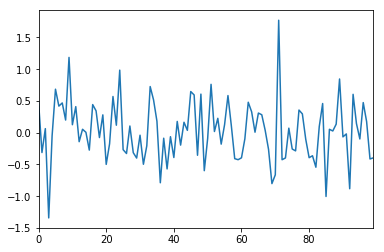

In [73]:
s.plot()

This is our Series data. Unlike the arrays Series have other options. `Series` are more useful for data analysis compared to the arrays. Though they have different uses. 

In [74]:
print(s.name)

None


We do not have a name for series. Let's define it:

In [75]:
s.name = "Stock returns"
print(s.name)

Stock returns


In [76]:
print(s.index)

RangeIndex(start=0, stop=100, step=1)


Assume that this is a return data of a stock. So the Index range should be data, daily:

[pandas.date_range](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html)

In [77]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="B")

- set a starting date: `2016-01-01`
- defined the periods with: `len(s)`
- frequency created for the business days to skip weekends: `B`

In [78]:
s.index = new_index

We change the series index with `new_index` created above. Let's plot it:

[pandas.series.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html)

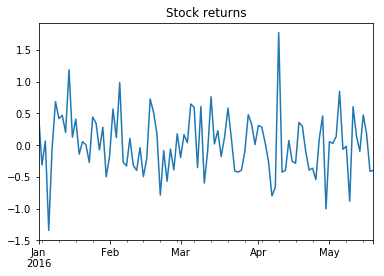

In [79]:
s.plot(title=s.name)

Well... We have a more proper plot compared to the first one. Please be careful about the options. 

Assume these values are percentage, like `1%`. What happened at the end of the day? We need to define them as $s \times 0.01 + $ to see their true values. After this process we will find cumulative product:

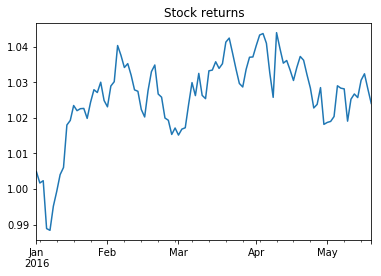

In [80]:
s_cum = (s*0.01 + 1).cumprod()
s_cum.plot(title=s_cum.name)

It looks like within 100 days our stock price increased/decreased(percent): 

In [81]:
print((s_cum[-1] - 1)*100)

2.40239482245


### Accessing elements

`iloc[start:end:step]`

By default `step=1`.

In [84]:
print("First element of the series: ", s.iloc[0])
print("Last element of the series: ", s.iloc[len(s)-1])
print("(or) Last element of the series: ", s.iloc[-1])

First element of the series:  0.483070009334
Last element of the series:  -0.394905912349
(or)Last element of the series:  -0.394905912349


You can make slicing:

In [85]:
print(s.iloc[:10])

2016-01-01    0.483070
2016-01-04   -0.311935
2016-01-05    0.064338
2016-01-06   -1.340761
2016-01-07   -0.048894
2016-01-08    0.684970
2016-01-11    0.418712
2016-01-12    0.468986
2016-01-13    0.199612
2016-01-14    1.185406
Freq: B, Name: Stock returns, dtype: float64


In [135]:
print(s.iloc[:100:10])

2016-01-01    0.483070
2016-01-15    0.125994
2016-01-29   -0.498062
2016-02-12   -0.039106
2016-02-26   -0.390126
2016-03-11   -0.089328
2016-03-25   -0.394837
2016-04-08   -0.662184
2016-04-22   -0.392648
2016-05-06   -0.065045
Freq: 10B, Name: Stock returns, dtype: float64


You can access series elements with `index_name`:

In [132]:
print(s.loc['2016-01-01'])

0.483070009334


In [133]:
print(s.loc['2016-01-01':'2016-01-10']) # Between dates

2016-01-01    0.483070
2016-01-04   -0.311935
2016-01-05    0.064338
2016-01-06   -1.340761
2016-01-07   -0.048894
2016-01-08    0.684970
Freq: B, Name: Stock returns, dtype: float64


### Boolean

Which dates have negative returns?

In [130]:
print((s < 0).head())

2016-01-01    False
2016-01-04     True
2016-01-05    False
2016-01-06     True
2016-01-07     True
Freq: B, Name: Stock returns, dtype: bool


How to access those series?

In [129]:
print(s[s < 0].head())

2016-01-04   -0.311935
2016-01-06   -1.340761
2016-01-07   -0.048894
2016-01-19   -0.141090
2016-01-22   -0.273300
Name: Stock returns, dtype: float64


In [97]:
print(s[s > 1])

2016-01-14    1.185406
2016-04-11    1.770334
Name: Stock returns, dtype: float64


It looks like we have only series above that are greater than 1.

In [100]:
print(s[(s > 1) | (s < -1)])

2016-01-06   -1.340761
2016-01-14    1.185406
2016-04-11    1.770334
2016-04-29   -1.003314
Name: Stock returns, dtype: float64


Or simply:

In [101]:
print(s[np.abs(s) > 1])

2016-01-06   -1.340761
2016-01-14    1.185406
2016-04-11    1.770334
2016-04-29   -1.003314
Name: Stock returns, dtype: float64


### Some basic functions:

In [136]:
print(s.mean()) # mean
print(s.std()) # standard deviation
print(s.max()) # max value
print(s.min()) # min value
print(s.median()) # median value

0.024862346192427474
0.47588942706308945
1.77033441627
-1.34076114142
0.023328870890846246


In [128]:
print(s.abs().head()) # Returns absolute values

2016-01-01    0.483070
2016-01-04    0.311935
2016-01-05    0.064338
2016-01-06    1.340761
2016-01-07    0.048894
Freq: B, Name: Stock returns, dtype: float64


### NaN values

In [114]:
new_series = pd.Series([1,5,np.nan,2,6,8,2,np.nan])

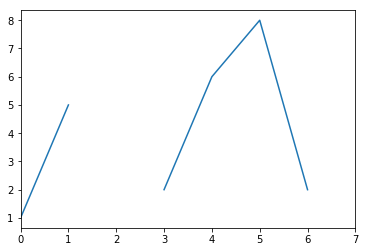

In [115]:
new_series.plot()

We can drop null values:

In [119]:
new_series = new_series.dropna()

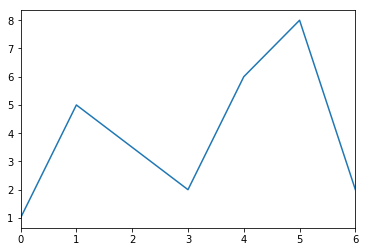

In [120]:
new_series.plot()

## DataFrame

[pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

- Dataframe
- rolling mean
- file operations

We can carry many operations of the `Series` within the `pandas.DataFrame`

In [137]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print (dict_data)

{'a': [1, 2, 3, 4, 5], 'b': ['L', 'K', 'J', 'M', 'Z'], 'c': array([-0.02559054, -1.39424063, -0.08220515,  1.04658475,  0.12730595])}


In [138]:
df = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print (df)

            a  b         c
2016-01-01  1  L -0.025591
2016-01-02  2  K -1.394241
2016-01-03  3  J -0.082205
2016-01-04  4  M  1.046585
2016-01-05  5  Z  0.127306


What happened here is that we define three series named `a, b, and c`. They can converted to the `pandas.Series` seperately instead we create a `DataFrame` to combine all attributes. Each column in the `DataFrame` are a `pandas.Series`.

In [141]:
print(type(df['a']))
print(type(df['b']))
print(type(df['c']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


But together:

In [142]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


You can define a `DataFrame` in many ways:

In [143]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print(numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


Column names:

In [144]:
print(numbers.columns)

Index(['Evens', 'Odds'], dtype='object')


Change column names:

In [145]:
numbers.columns = ['Shmevens', 'Shmodds']

In [146]:
print(numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


Most of the attributes of the `pandas.Series` are valid for `DataFrames`:

In [147]:
print(numbers.index)

RangeIndex(start=0, stop=5, step=1)


In [148]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print(numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


In [149]:
print(numbers.values)

[[ 2  1]
 [ 4  3]
 [ 6  5]
 [ 8  7]
 [10  9]]


Let's create a similar DataFrame as done with series, randomly:

In [150]:
dist = np.random.normal(0, 0.5, (100,10))

In [153]:
df = pd.DataFrame(dist)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-0.108153,-0.455635,0.509147,-0.246972,0.600188,0.279619,-0.457287,0.170540,-0.350081,-0.906273
1,-0.672657,0.611914,0.777550,0.289494,0.412834,0.601548,0.155076,0.258229,-1.249843,-1.084246
2,0.594375,-0.637600,-0.120537,-0.576603,-0.306880,0.308746,-0.007661,0.303328,0.812060,-0.525469
3,-0.332196,0.042465,-0.639609,-0.007508,-0.074882,0.502859,-0.789998,-0.888698,0.548618,-0.167398
4,-0.433269,0.633785,0.778991,-0.084686,0.431378,-0.496091,0.133972,0.080846,-0.398608,0.452690


In [154]:
df.index = pd.date_range("2016-01-01", periods=len(df.index), freq='B')

In [155]:
df.columns = ['Stck {}'.format(str(i)) for i in range(1,11)]

In [156]:
df.head()

,Stck 1,Stck 2,Stck 3,Stck 4,Stck 5,Stck 6,Stck 7,Stck 8,Stck 9,Stck 10
2016-01-01,-0.108153,-0.455635,0.509147,-0.246972,0.600188,0.279619,-0.457287,0.170540,-0.350081,-0.906273
2016-01-04,-0.672657,0.611914,0.777550,0.289494,0.412834,0.601548,0.155076,0.258229,-1.249843,-1.084246
2016-01-05,0.594375,-0.637600,-0.120537,-0.576603,-0.306880,0.308746,-0.007661,0.303328,0.812060,-0.525469
2016-01-06,-0.332196,0.042465,-0.639609,-0.007508,-0.074882,0.502859,-0.789998,-0.888698,0.548618,-0.167398
2016-01-07,-0.433269,0.633785,0.778991,-0.084686,0.431378,-0.496091,0.133972,0.080846,-0.398608,0.452690


Now we have 10 stock prices returns within one DataFrame. Let's calculate the returns as multiplication of previous day: 

In [159]:
df_cum = df*0.01 + 1
df_cum = df_cum.cumprod()

In [160]:
df_cum.head()

,Stck 1,Stck 2,Stck 3,Stck 4,Stck 5,Stck 6,Stck 7,Stck 8,Stck 9,Stck 10
2016-01-01,0.998918,0.995444,1.005091,0.997530,1.006002,1.002796,0.995427,1.001705,0.996499,0.990937
2016-01-04,0.992199,1.001535,1.012907,1.000418,1.010155,1.008828,0.996971,1.004292,0.984045,0.980193
2016-01-05,0.998097,0.995149,1.011686,0.994650,1.007055,1.011943,0.996894,1.007338,0.992036,0.975042
2016-01-06,0.994781,0.995572,1.005215,0.994575,1.006301,1.017032,0.989019,0.998386,0.997478,0.973410
2016-01-07,0.990471,1.001881,1.013045,0.993733,1.010642,1.011986,0.990344,0.999193,0.993502,0.977817


[pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

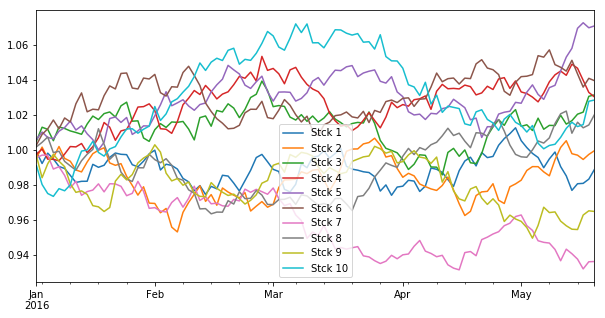

In [166]:
df_cum.plot(figsize = (10,5))

As you see at the end of the day some stocks made profit and some made loss. 

Locating the values works same with `Series`. The last day profits are loses:

In [172]:
df_cum.iloc[-1]

Stck 1     0.988823
Stck 2     0.999521
Stck 3     1.031383
Stck 4     1.030200
Stck 5     1.070779
Stck 6     1.039489
Stck 7     0.936199
Stck 8     1.020096
Stck 9     0.964788
Stck 10    1.028425
Name: 2016-05-19 00:00:00, dtype: float64

**BUT ** This is a two dimensional shape and you need two parameters to locate specific values. 

In [173]:
df_cum.iloc[-1,2]

1.0313829096908862

For example we can only care about profited stocks:

In [178]:
df_cum.iloc[-1]>1

Stck 1     False
Stck 2     False
Stck 3      True
Stck 4      True
Stck 5      True
Stck 6      True
Stck 7     False
Stck 8      True
Stck 9     False
Stck 10     True
Name: 2016-05-19 00:00:00, dtype: bool

### Adding new columns

You can simply define a column name:

In [179]:
df['new'] = 1

In [180]:
df.head()

,Stck 1,Stck 2,Stck 3,Stck 4,Stck 5,Stck 6,Stck 7,Stck 8,Stck 9,Stck 10,new
2016-01-01,-0.108153,-0.455635,0.509147,-0.246972,0.600188,0.279619,-0.457287,0.170540,-0.350081,-0.906273,1
2016-01-04,-0.672657,0.611914,0.777550,0.289494,0.412834,0.601548,0.155076,0.258229,-1.249843,-1.084246,1
2016-01-05,0.594375,-0.637600,-0.120537,-0.576603,-0.306880,0.308746,-0.007661,0.303328,0.812060,-0.525469,1
2016-01-06,-0.332196,0.042465,-0.639609,-0.007508,-0.074882,0.502859,-0.789998,-0.888698,0.548618,-0.167398,1
2016-01-07,-0.433269,0.633785,0.778991,-0.084686,0.431378,-0.496091,0.133972,0.080846,-0.398608,0.452690,1


- all
- any

- fillna
- 